In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.8/39.0 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.8/39.0 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.8/39.0 MB 1.1 MB/s eta 0:00:35
   - -------------------------------------- 1.0/39.0 MB 868.0 kB/s eta 0:00:44
   - -------------------------------------- 1.3/39.0 MB 849.7 kB/s eta 0:00:45
   - -------------------------------------- 1.6/39.0 MB 873.8 kB/s eta 0:00:43
   - -------------------------------------- 1.6/39.0 MB 873.8 kB/s eta 0:00:43
   - -------------------------------------- 1.8/39.0 MB 860.4 kB/s eta 0:00:44
   - -------------------------------------- 1.8/39.0 MB 860.4 kB/s eta 0:00:44
   -- ------------------------------------- 2.1/39.0 MB 804.5 kB/s eta 0:00:46


[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install astropy

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/6.3 MB 3.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.0/6.3 MB 2.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.3/6.3 MB 2.8 MB/s eta 0:00:02
   ------------- -------------------------- 2.1/6.3 MB 2.3 MB/s eta 0:00:02
   ------------------ --------------------- 2.9/6.3 MB 2.6 MB/s eta 0:00:02
   --------------------- ------------------ 3.4/6.3 MB 2.7 MB/s eta 0:00:02
   -------------------------- ------------- 4.2/6.3 MB 2.8 MB/s eta 0:00:01
   ------------------------------ --------- 4.7/6.3 MB 2.9 MB/s eta 0:00:01
   ----------------------------------- ---- 5.5/6.3 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------- -------------


[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<bound method Header.keys of SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
GRT_DT  = '2025-09-28T07:04:40.687' / GRT Time                                  
DHOBT_DT= '2025-09-27T06:00:19.845590000' / UTC time with respect to DHOBT      
FRM_CNT =                 5399 / Frame counter                                  
DHOBTCNT=         537767272002 / DHOBT Counter Clock                            
SDRAM   =           2679635968 / SDRAM Headers                                  
PACKET  =           4188285873 / Header identifier                              
IMGTRID =                40887 / Image Transfer ID                              

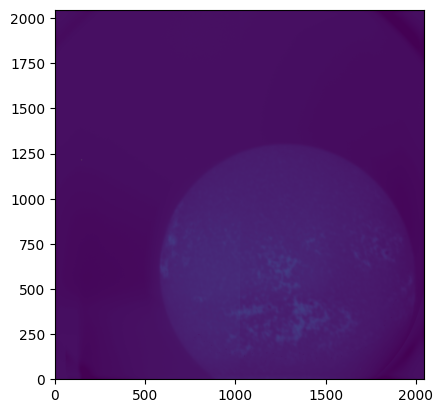

In [4]:
# grid space containing
from astropy.io import fits
import matplotlib.pyplot as plt
 # Load the data
import os
# for image in os.listdir('fit_data')
with fits.open('fit_data/SUT_T25_1400_001378_Lev1.0_2025-09-27T06.00.19.845_0972NB03.fits') as inFile:
    data = inFile[0].data
    header = inFile[0].header
    print(header.keys) #Shows all the headers
    plt.imshow(data, origin='lower') #Plot using matplotlib
    plt.show()

In [1]:
def fits_to_video(folder):
    import os
    import cv2
    import sunpy.map
    import matplotlib.pyplot as plt

    # --- Step 1: Prepare output folder ---
    out_folder = os.path.join(folder, "jpg_output")
    os.makedirs(out_folder, exist_ok=True)

    # --- Step 2: Convert FITS → JPG ---
    for file in sorted(os.listdir(folder)):
        if file.lower().endswith(('.fits', '.fit')):
            amap = sunpy.map.Map(os.path.join(folder, file))
            plt.figure(figsize=(6, 6))
            amap.plot(cmap='inferno', vmin=100, vmax=6e4)
            amap.draw_grid()
            plt.axis("off")

            out_path = os.path.join(out_folder, os.path.splitext(file)[0] + ".jpg")
            plt.savefig(out_path, format='jpg', dpi=150, bbox_inches='tight', pad_inches=0)
            plt.close()

    # --- Step 3: Generate Video from JPGs ---
    images = sorted([f for f in os.listdir(out_folder) if f.endswith(".jpg")])
    if not images:
        print("❌ No JPG images found.")
        return

    first_frame = cv2.imread(os.path.join(out_folder, images[0]))
    h, w, _ = first_frame.shape
    video_path = os.path.join(folder, "sun_video.mp4")

    video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), 10, (w, h))
    for img in images:
        frame = cv2.imread(os.path.join(out_folder, img))
        video.write(frame)
    video.release()

    print(f"✅ JPGs saved in: {out_folder}")
    print(f"✅ Video created: {video_path}")
fits_to_video('fit_data')


c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ JPGs saved in: fit_data\jpg_output
✅ Video created: fit_data\sun_video.mp4


In [2]:
def fits_video(path):
    import os
    import sunpy.map
    import matplotlib.pyplot as plt

    # Create output folder for JPGs
    output_folder = os.path.join(path, "jpg_output")
    os.makedirs(output_folder, exist_ok=True)

    # Loop through all FITS files
    for image in os.listdir(path):
        if image.lower().endswith(('.fits', '.fit')):
            image_path = os.path.join(path, image)
            amap = sunpy.map.Map(image_path)

            # Plot and save as JPG
            fig = plt.figure(figsize=(6, 6))
            amap.plot(cmap='inferno', vmin=100, vmax=6e4)
            amap.draw_grid()
            plt.title(image)

            # Save image
            output_name = os.path.splitext(image)[0] + ".jpg"
            output_path = os.path.join(output_folder, output_name)
            plt.savefig(output_path, format='jpg', dpi=150, bbox_inches='tight')
            plt.close(fig)

    video_gen(output_path)


In [7]:
def video_gen(path):

    import cv2
    import os

    # Folder containing your 91 sun images
    image_folder = path
    # Output video filename
    output_video = 'sun_video.avi'

    # Get sorted list of image files (assuming .png or .jpg)
    images = [img for img in sorted(os.listdir(image_folder)) if img.endswith('.png') or img.endswith('.jpg')]

    # Read the first image to get frame size
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    # Define the codec and create VideoWriter object
    video = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'XVID'), 10, (width, height))  # 10 FPS

    # Write each image as a frame to the video
    for image in images:
        image_path = os.path.join(image_folder, image)
        frame = cv2.imread(image_path)
        video.write(frame)

    video.release()

    print("Video creation completed: ", output_video)


video_gen('fit_data/jpg_output')

Video creation completed:  sun_video.avi


In [3]:
fits_video('fit_data')

NameError: name 'video_gen' is not defined

In [10]:
!pip install suitcolormap

ERROR: Could not find a version that satisfies the requirement suitcolormap (from versions: none)

[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for suitcolormap


In [ ]:
import sunpy.map
from astropy.io import fits

# Open the FITS file and patch the header if needed
with fits.open("VS1_T25_0895_002304_20250613_175941_LG_lev2_V2_1.fits") as hdul:
	hdr = hdul[0].header
	# Patch the unit string if present
	for key in hdr:
		if isinstance(hdr[key], str) and 'milli-angstrom' in hdr[key]:
			hdr[key] = hdr[key].replace('milli-angstrom', 'angstrom')
	# Force CUNIT1 to 'arcsec' to satisfy SunPy Map requirements
	hdr['CUNIT1'] = 'arcsec'
	# Create the SunPy map from the patched HDU
	observer = sunpy.map.Map(hdul[0].data, hdr)